In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load your datasets as DataFrames (replace "dataset.csv" with actual file names)
toyota_df = pd.read_csv("ToyotaCorolla.csv")
fifa_df = pd.read_csv("fifa.csv")
flightdelays_df = pd.read_csv("flight_delays.csv")
candy_df = pd.read_csv("candy.csv")

### a) Describe the dataset
print("Toyota Dataset Description:")
print(toyota_df.describe(include='all'))

print("FIFA Dataset Description:")
print(fifa_df.describe(include='all'))

print("Flight Delays Dataset Description:")
print(flightdelays_df.describe(include='all'))

print("Candy Dataset Description:")
print(candy_df.describe(include='all'))

Toyota Dataset Description:
                 Id                                              Model  \
count   1436.000000                                               1436   
unique          NaN                                                372   
top             NaN  TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-...   
freq            NaN                                                107   
mean     721.555014                                                NaN   
std      416.476890                                                NaN   
min        1.000000                                                NaN   
25%      361.750000                                                NaN   
50%      721.500000                                                NaN   
75%     1081.250000                                                NaN   
max     1442.000000                                                NaN   

               Price    Age_08_04    Mfg_Month     Mfg_Year             KM  \
count

In [2]:
### b) Calculate Mean, Median, Mode, Variance, and Standard Deviation

for df, name in zip([toyota_df, fifa_df, flightdelays_df, candy_df],
                    ["Toyota", "FIFA", "Flight Delays", "Candy"]):
    print(f"\n{name} Dataset - Statistical Measures:")
    for column in df.select_dtypes(include=[np.number]).columns:
        print(f"\nColumn: {column}")
        print(f"Mean: {df[column].mean()}")
        print(f"Median: {df[column].median()}")
        print(f"Mode: {df[column].mode()[0]}")
        print(f"Variance: {df[column].var()}")
        print(f"Standard Deviation: {df[column].std()}")



Toyota Dataset - Statistical Measures:

Column: Id
Mean: 721.5550139275766
Median: 721.5
Mode: 1
Variance: 173452.99975881513
Standard Deviation: 416.4768898256122

Column: Price
Mean: 10730.824512534818
Median: 9900.0
Mode: 8950
Variance: 13154872.100193143
Standard Deviation: 3626.9645849102444

Column: Age_08_04
Mean: 55.94707520891365
Median: 61.0
Mode: 68
Variance: 345.9595663525279
Standard Deviation: 18.599988342806235

Column: Mfg_Month
Mean: 5.548746518105849
Median: 5.0
Mode: 1
Variance: 11.249886929430376
Standard Deviation: 3.3540851106420027

Column: Mfg_Year
Mean: 1999.625348189415
Median: 1999.0
Mode: 1999
Variance: 2.373823920491493
Standard Deviation: 1.5407218829144647

Column: KM
Mean: 68533.25974930362
Median: 63389.5
Mode: 36000
Variance: 1406733707.0021698
Standard Deviation: 37506.44887218956

Column: HP
Mean: 101.50208913649026
Median: 110.0
Mode: 110
Variance: 224.43274824570764
Standard Deviation: 14.9810796755677

Column: Met_Color
Mean: 0.674791086350975
Me


Age_08_04 IQR: 26.0

Z-scores for Age_08_04 (First 5): 0   -1.771966
1   -1.771966
2   -1.718184
3   -1.610620
4   -1.395491
Name: Age_08_04, dtype: float64

Price IQR: 3500.0

Z-scores for Price (First 5): 0    0.763763
1    0.832715
2    0.887877
3    1.163685
4    0.832715
Name: Price, dtype: float64

KM IQR: 44020.75

Z-scores for KM (First 5): 0   -0.574695
1    0.117454
2   -0.715386
3   -0.547650
4   -0.801028
Name: KM, dtype: float64


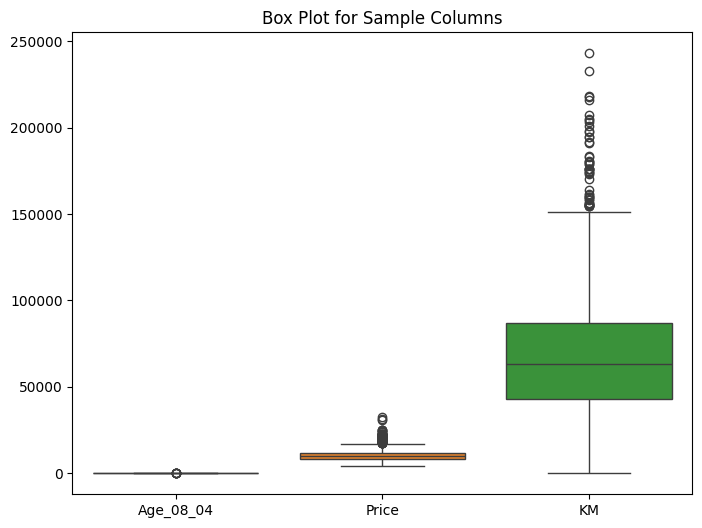

In [3]:
### c) Calculate IQR and Z-score for three items and verify using box plot

# Selecting three sample columns (e.g., 'Age_08_04', 'Price' in Toyota dataset)
sample_columns = ['Age_08_04', 'Price', 'KM']  # replace these as needed

for column in sample_columns:
    Q1 = toyota_df[column].quantile(0.25)
    Q3 = toyota_df[column].quantile(0.75)
    IQR = Q3 - Q1
    print(f"\n{column} IQR: {IQR}")

    # Calculate z-scores
    z_scores = stats.zscore(toyota_df[column].dropna())
    print(f"\nZ-scores for {column} (First 5): {z_scores[:5]}")

# Verify with box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=toyota_df[sample_columns])
plt.title("Box Plot for Sample Columns")
plt.show()

In [4]:
### d) Display all features in a grid
sns.pairplot(toyota_df.select_dtypes(include=[np.number]))
plt.suptitle("Pair Plot of Toyota Dataset Features")
plt.show()

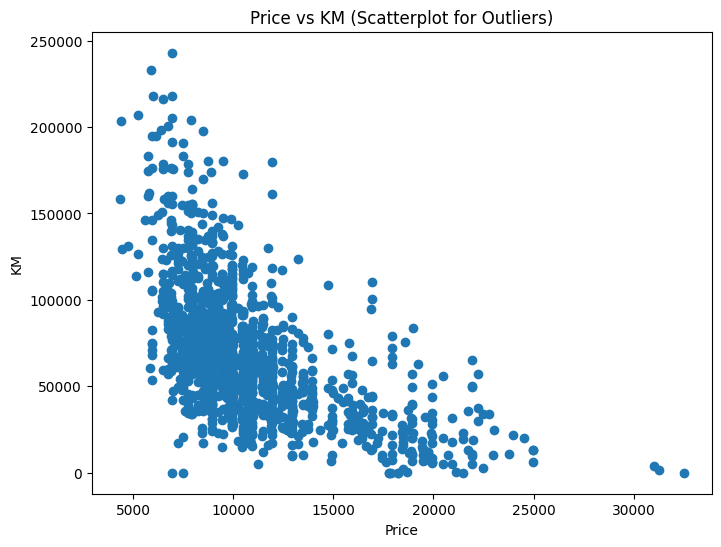

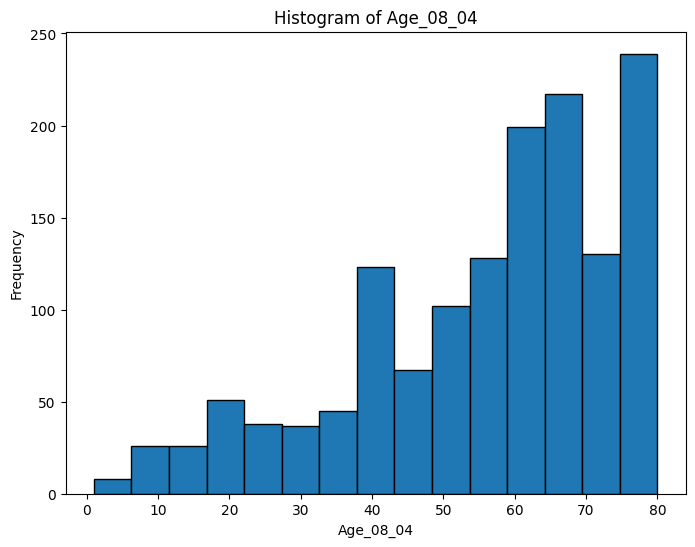

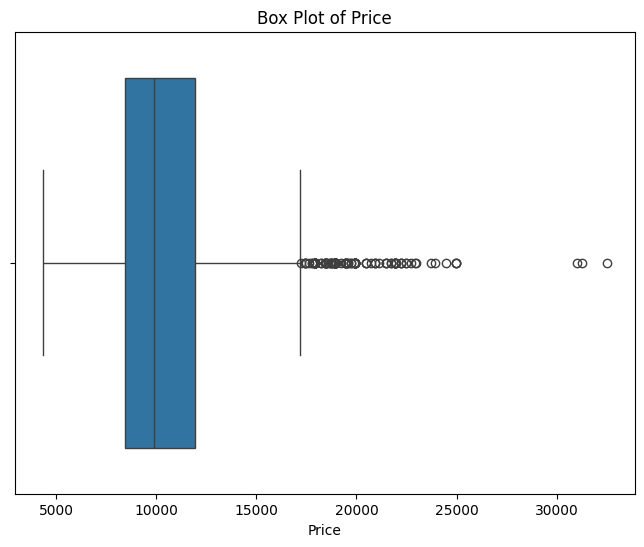

In [5]:
### e) Identify outliers with scatterplot, histogram, and box plot

# Scatterplot for detecting outliers in 'Price' and 'KM'
plt.figure(figsize=(8, 6))
plt.scatter(toyota_df['Price'], toyota_df['KM'])
plt.xlabel("Price")
plt.ylabel("KM")
plt.title("Price vs KM (Scatterplot for Outliers)")
plt.show()

# Histogram for 'Age_08_04'
plt.figure(figsize=(8, 6))
plt.hist(toyota_df['Age_08_04'], bins=15, edgecolor="k")
plt.xlabel("Age_08_04")
plt.ylabel("Frequency")
plt.title("Histogram of Age_08_04")
plt.show()

# Box plot for 'Price' to check outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=toyota_df['Price'])
plt.title("Box Plot of Price")
plt.show()

In [6]:
### f) Fill missing values with the mean value of the dataset
toyota_df.fillna(toyota_df.mean(), inplace=True)

### g) Find Pearson and Spearman correlation and display results

# Pearson correlation example (Price and Age_08_04 in Toyota dataset)
pearson_corr = toyota_df['Price'].corr(toyota_df['Age_08_04'], method='pearson')
print(f"\nPearson Correlation between Price and Age_08_04: {pearson_corr}")

# Spearman correlation example (Price and KM in Toyota dataset)
spearman_corr = toyota_df['Price'].corr(toyota_df['KM'], method='spearman')
print(f"Spearman Correlation between Price and KM: {spearman_corr}")

### h) Display the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(toyota_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap for Toyota Dataset")
plt.show()

TypeError: Could not convert ['TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-DoorsTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-DoorsTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-DoorsTOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-DoorsTOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors?TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-DoorsTOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors?TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors?TOYOTA Corolla 1.9 D HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.8 VVTL-i T-Sport 3-Drs 2/3-DoorsTOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT BNS 2/3-DoorsTOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-DoorsTOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-DoorsTOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-DoorsTOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-Doors?TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-Doors?TOYOTA Corolla 1.6 VVTI Linea Terra Comfort 2/3-DoorsTOYOTA Corolla 1.6 16v L.SOL 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I 3DR TERRA 2/3-Doors?TOYOTA Corolla 1.6 16V VVT I 3DR TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I 3DR SOL AUT4 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I 3DR SOL 2/3-Doors?TOYOTA Corolla 1.6 16V VVT I 3DR SOL 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I 3DR SOL 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I 3DR SOL 2/3-Doors?TOYOTA Corolla 1.6 16V VVT I 3DR SOL 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I 3DR SOL 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I 3DR SOL 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I 3DR SOL 2/3-Doors?TOYOTA Corolla 1.4 VVTI Linea Terra 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I 3DR TERRA COMFORT 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I 3DR TERRA COMFORT 2/3-Doors?TOYOTA Corolla 1.4 16V VVT I 3DR TERRA COMFORT 2/3-Doors?TOYOTA Corolla 1.4 16V VVT I 3DR TERRA COMFORT 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I 3DR TERRA COMFORT 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I 3DR TERRA COMFORT 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I 3DR TERRA 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I 3DR TERRA 2/3-Doors?TOYOTA Corolla 1.4 16V VVT I 3DR 2/3-Doors?TOYOTA Corolla 1.4 16V VVT I 3DR 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I 3DR 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I 3DR 2/3-DoorsTOYOTA Corolla 2.0 D4D 90 5DR TERRA COMFORT 4/5-DoorsTOYOTA Corolla 2.0 D4D 90 5DR TERRA COMFORT 4/5-Doors?TOYOTA Corolla 2.0 D4D 90 5DR SOL 4/5-DoorsTOYOTA Corolla 2.0 D4D 90 5DR TERRA 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I 5DR TERRA COMFORT 4/5-Doors?TOYOTA Corolla 2.0 D4D 90 5DR TERRA COMFORT 4/5-DoorsTOYOTA Corolla 1.8 16V VVTLI 5DR T SPORT 4/5-DoorsTOYOTA Corolla 2.0 D4D 90 5DR TERRA COMFORT 4/5-Doors?TOYOTA Corolla 1.4 16V VVT I 5DR TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I 5DR SOL AUT4 4/5-DoorsTOYOTA Corolla 1.8 VVTL-i T-Sport 4/5-Doors?TOYOTA Corolla 1.6 16V VVT I 5DR TERRA AUT4 4/5-Doors?TOYOTA Corolla 1.6 16V VVT I LIFTB LUNA 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I 5DR TERRA 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I 5DR TERRA COMFORT 4/5-Doors?TOYOTA Corolla 1.6 16V VVT I 5DR SOL AUT4 4/5-Doors?TOYOTA Corolla 1.6 16V VVT I 5DR SOL 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I 5DR TERRA COMFORT 4/5-Doors?TOYOTA Corolla 1.6 16V VVT I 5DR SOL 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I 5DR SOL 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I 5DR SOL 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I 5DR TERRA COMFORT 4/5-DoorsTOYOTA Corolla 1.6 VVT-I 5DR LINEA SOL 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I 5DR SOL 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I 5DR TERRA COMFORT 4/5-DoorsTOYOTA Corolla 2.0 D4D 110 5DR SOL 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I 5DR TERRA 4/5-Doors?TOYOTA Corolla 1.4 16V VVT I 5DR TERRA 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I LIFTB TERRA 4/5-Doors?TOYOTA Corolla 1.6 16V VVT I 5DR SOL 4/5-Doors?TOYOTA Corolla 1.4 16V VVT I 5DR 4/5-Doors?TOYOTA Corolla 1.6 16V VVT I 5DR SOL 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I 5DR TERRA COMFORT 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I 5DR SOL 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I 5DR TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I 5DR TERRA 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I 5DR TERRA 4/5-DoorsTOYOTA Corolla 1.6 5drs 1 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I 5DR TERRA 4/5-Doors?TOYOTA Corolla 1.4 16V VVT I 5DR 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I 5DR SOL AUT4 4/5-Doors?TOYOTA Corolla 1.4 16V VVT I 5DR TERRA COMFORT 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I 5DR SOL 4/5-Doors?TOYOTA Corolla 1.4 VVTI  (Nw type) 4/5-DoorsTOYOTA Corolla 2.0 D4D 90 3DR TERRA COMF BNS 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I 3DR TERRA COMFORT 2/3-DoorsTOYOTA Corolla 2.0 D4D 110 3DR SOL 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I 3DR TERRA COMFORT 2/3-Doors?TOYOTA Corolla 2.0 D4D 90 3DR SOL BNS 2/3-DoorsTOYOTA Corolla 2.0 D 4D Linea Sol 3 Doors 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I 3DR TERRA COMFORT 2/3-DoorsTOYOTA Corolla 1.6 16v VVT-i Linea Sol 2/3-DoorsTOYOTA Corolla 2.0 D4D Linea Sol 3 Doors 2/3-Doors?TOYOTA Corolla 1.4 16V VVT I 3DR TERRA COMFORT 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I 3DR TERRA COMFORT 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I 3DR SOL 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I 3DR TERRA COMFORT 2/3-Doors?TOYOTA Corolla 1.6 16V VVT I 3DR SOL 2/3-Doors?TOYOTA Corolla 1.4 16V VVT I 3DR TERRA COMFORT 2/3-DoorsTOYOTA Corolla 1.4 VVT-i Sol 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I 3DR TERRA COMFORT 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I 3DR TERRA COMF AUT 2/3-Doors?TOYOTA Corolla 1.4 16V VVT I 3DR TERRA COMFORT 2/3-Doors?TOYOTA Corolla 1.6 VVT-i Linea Terra Comfort 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I 3DR 2/3-Doors?TOYOTA Corolla 1.6 16V VVT I 3DR TERRA COMFORT 2/3-Doors?TOYOTA Corolla VERSO 2.0 D4D SOL (7) BNS MPVTOYOTA Corolla VERSO 2.0 D4D SOL (7) MPVTOYOTA Corolla VERSO 2.0 D4D SOL (7) MPV?TOYOTA Corolla VERSO 2.0 D4D LINEA SOL MPVTOYOTA Corolla VERSO 2.0 D4D LINEA SOL MPVTOYOTA Corolla 2.0 D4D 116 5DR LUNA 4/5-DoorsTOYOTA Corolla 2.0 D4D 90 WAGON SOL Stationwagen?TOYOTA Corolla 2.0 D4D 90 5DR SOL 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I 3DR TERRA COMFORT 2/3-DoorsTOYOTA Corolla 2.0 D4D 90 5DR TERRA COMFORT 4/5-DoorsTOYOTA Corolla 2.0 D4D 110 5DR EXEC BNS 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I 5DR TERRA COMFORT 4/5-Doors?TOYOTA Corolla 2.0 D4D Linea Terra Comfort 4/5-Doors?TOYOTA Corolla 1.6 16V VVT I 5DR TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I 5DR SOL 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I 5DR SOL 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I 5DR EXEC 4/5-DoorsTOYOTA Corolla 1.6 VVT-i Linea Sol 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I 5DR TERRA COMFORT 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I 5DR SOL 4/5-DoorsTOYOTA Corolla 1.6 vvt-i nw model comfort airco 5drs 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I 5DR TERRA COMFORT 4/5-Doors?TOYOTA Corolla 1.4 16V VVT I 5DR TERRA COMFORT 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I 5DR TERRA COMFORT 4/5-DoorsTOYOTA Corolla 1 6-16v VVT-i Linea Terra Comfort Airco 5drs 4/5-Doors?TOYOTA Corolla 1.4 16V VVT I 5DR TERRA COMFORT 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I 5DR TERRA COMFORT 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I 5DR SOL 4/5-Doors?TOYOTA Corolla 1.6 terra comfort 5drs airco 4/5-DoorsTOYOTA Corolla Luna 5drs D4D116 PK 4/5-DoorsTOYOTA Corolla 1.6i 16V VVT I SOL + Navigatie 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I 5DR TERRA COMFORT 4/5-Doors?TOYOTA Corolla 1.8 VVTL-i T-Sport 3-Drs 4/5-Doors?TOYOTA Corolla 1.6 16V VVT I 5DR SOL 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I SEDAN TERRA COMF 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I 5DR SOL 4/5-Doors?TOYOTA Corolla 1.4 16V VVT I 5DR TERRA 4/5-Doors?TOYOTA Corolla 1.6 16V VVT I 5DR TERRA COMF AUT 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I 5DR EXEC BNS 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I 5DR SOL 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I SEDAN SOL AUT4 4/5-Doors?TOYOTA Corolla 1.4 16V VVT I 5DR TERRA COMFORT 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I 5DR SOL BNS 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I 5DR LUNA BNS 4/5-Doors?TOYOTA Corolla 1.6 16V VVT I 5DR TERRA COMFORT 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I 5DR EXEC 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I SEDAN TERRA COMF 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I SEDAN SOL 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I 5DR TERRA COMFORT 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I 5DR SOL 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I 5DR SOL AUT4 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I SEDAN SOL 4/5-Doors?TOYOTA Corolla 1.6 16v VVTi Linea Sol 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I 5DR TERRA COMFORT 4/5-DoorsTOYOTA Corolla 1.6 16v VVTi Terra Comfort 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I 5DR TERRA COMFORT 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I 5DR SOL 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I 5DR EXEC 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I SEDAN SOL BNS AUT4 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I 5DR SOL 4/5-DoorsTOYOTA Corolla 1.4-16v VVT-i Linea Terra Comfort NIEUW AIRCO 4/5-DoorsTOYOTA Corolla 1.6-16v VVT-i Linea Terra Comfort AIRCO NIEUW 5DRS 4/5-DoorsTOYOTA Corolla 1.6-16v VVT-i Executive B.edition 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I 5DR LUNA 4/5-Doors?TOYOTA Corolla 1.4 16V VVT I 5DR LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I 5DR SOL 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I 5DR SOL 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I 5DR TERRA COMFORT 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I 5DR TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I 5DR SOL 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I 5DR EXEC 4/5-DoorsTOYOTA Corolla 1.6 VVT-I 5DR LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I 5DR TERRA COMFORT 4/5-DoorsTOYOTA Corolla 1.4 16V 5DR TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I 5DR SOL 4/5-Doors?TOYOTA Corolla 1.4-16v VVT-i Linea Terra Comfort NIEUW AIRCO 4/5-DoorsTOYOTA Corolla 1.6-16v VVT-i Linea Terra Comfort NIEUW AIRCO 5drs 4/5-DoorsTOYOTA Corolla 1.9 D HATCHB SOL 2/3-DoorsTOYOTA Corolla 2.0 D4D SEDAN SOL 4/5-DoorsTOYOTA Corolla 2.0 D4D LIFTB SOL 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.9 D HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.8D StationwagenTOYOTA Corolla 1.8D 4/5-DoorsTOYOTA Corolla 1.9 D LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.9 D WAGON TERRA StationwagenTOYOTA Corolla 1.6 16V VVT I LIFTB LUNA 4/5-DoorsTOYOTA Corolla 1.9 D Sedan 4/5-DoorsTOYOTA Corolla 2.0 D4D LIFTB SOL 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.4 VVTI Linea Terra 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB LUNA 4/5-DoorsTOYOTA Corolla 1.9 D HATCHB SOL 2/3-DoorsTOYOTA Corolla 19D LB Linea Terra 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I HATCHB SOL 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB SOL 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB SOL 4/5-DoorsTOYOTA Corolla 1.9 D WAGON TERRA StationwagenTOYOTA Corolla 2.0 D4D LIFTB SOL 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB LUNA AUT4 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB LUNA 4/5-DoorsTOYOTA Corolla 1.9 D HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB LUNA 4/5-DoorsTOYOTA Corolla 1.6 Terra LB 4/5-DoorsTOYOTA Corolla 1.6 HB LINEA SOL 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I SEDAN TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I WAGON BLUE StationwagenTOYOTA Corolla 1.6 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I LIFTB LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB SOL 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I LIFTB LUNA 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla LIFTBACK 1.6-16v Linea Luna 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB SOL 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I HATCHB SOL 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.6 VVTI Linea Terra liftback 4/5-DoorsTOYOTA Corolla 1.9 D HB SOL 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB SOL AUT4 4/5-DoorsTOYOTA Corolla 1.6 VVT-i Linea Sol 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I HATCHB G6 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I HATCHB SOL 2/3-DoorsTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I SEDAN TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V WAGON LINEA TERRA StationwagenTOYOTA Corolla 1.6 GL LB 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I SEDAN TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB LUNA AUT4 4/5-DoorsTOYOTA Corolla 1.6 Terra 5-Doors Liftback 4/5-DoorsTOYOTA Corolla 1.6-16v Linea Terra LB 4/5-DoorsTOYOTA Corolla 1.6I Luna liftback 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB LUNA 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I WAGON TERRA StationwagenTOYOTA Corolla 1.6 Linea Terra Sedan 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I LIFTB LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB SOL 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 2.0 D4D LIFTB SOL 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.9 D HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I WAGON TERRA StationwagenTOYOTA Corolla 1.9 D HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I SEDAN TERRA 4/5-DoorsTOYOTA Corolla 1.6 Terra LB 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I WAGON TERRA StationwagenTOYOTA Corolla 1.4 16V VVT I LIFTB LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.4 VVTI L.Terra HB 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I HATCHB G6 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I LIFTB LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB SOL 4/5-DoorsTOYOTA Corolla 1.4 LB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB LUNA AUT4 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I WAGON BLUE StationwagenTOYOTA Corolla 1.6 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB SOL 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB SOL 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I HATCHB G6 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I HATCHB SOL 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I HATCHB G6 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.6 16v VVTi Terra Comfort 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB SOL 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB SOL 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I LIFTB LUNA 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB SOL 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB SOL 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.6 SDN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I HATCHB G6 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB LUNA 4/5-DoorsTOYOTA Corolla 1.6 VVTi Linea terra 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.6v VVT-i Linea Sol 4/5-Doors?TOYOTA Corolla 1.6 16V VVT I LIFTB SOL 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I LIFTB LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.6I LIFTBACK 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I HATCHB SOL 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla Liftback 1.6 VVTI 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I HATCHB TERRA AUT4 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I HATCHB G6 2/3-Doors?TOYOTA Corolla 1.4 16V VVT I LIFTB LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-Doors?TOYOTA Corolla 1.6 16V VVT I HATCHB G6 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I HATCHB TERRA 2/3-Doors?TOYOTA Corolla 1.6 Terra LB Comf. 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I LIFTB TERRA 4/5-Doors?TOYOTA Corolla 1.4 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I LIFTB LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I HATCHB SOL 2/3-Doors?TOYOTA Corolla 1.6 16V VVT I LIFTB SOL 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I SEDAN TERRA AUT4 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I HATCHB G6 2/3-Doors?TOYOTA Corolla 1.6 16V VVT I LIFTB SOL 4/5-Doors?TOYOTA Corolla 1.6 VVTi Terra Comfort 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB LUNA 4/5-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.6 VVTI Linea Terra Comfort 4/5-Doors?TOYOTA Corolla 1.6 16V VVT I LIFTB SOL 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I SEDAN TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.4 LB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB SOL 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I LIFTB LUNA 4/5-DoorsTOYOTA Corolla 1.6 Linea Terra LB 4/5-DoorsTOYOTA Corolla 1.4 VVTI LB 4/5-Doors?TOYOTA Corolla 1.9 D HATCHB SOL 2/3-DoorsTOYOTA Corolla 1.9 D SEDAN TERRA 4/5-DoorsTOYOTA Corolla 1.9 D HATCHB TERRA 2/3-DoorsTOYOTA Corolla 2.0 DSL SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.9 D Sedan 4/5-DoorsTOYOTA Corolla 1.6 VVTi Linea terra 2/3-DoorsTOYOTA Corolla 2.0 DSL LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB SOL 4/5-DoorsTOYOTA Corolla 1.9 D LIFTB LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.9 D WGN LINEA TERRA Stationwagen?TOYOTA Corolla 1.9 D SEDAN TERRA 4/5-DoorsTOYOTA Corolla 2.0 DSL LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.9 D WAGON TERRA StationwagenTOYOTA Corolla 1.6 16V VVT I WAGON TERRA StationwagenTOYOTA Corolla 1.8D Stationwagen?TOYOTA Corolla 1.6 16V VVT I HATCHB G6 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB SOL 4/5-DoorsTOYOTA Corolla 1.9 D LB LINEA SOL 4/5-DoorsTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I SEDAN TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I SEDAN TERRA 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.9 D LIFTB TERRA 4/5-DoorsTOYOTA Corolla 2.0D 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.9 D WAGON TERRA StationwagenTOYOTA Corolla 1.6 16V VVT I LIFTB SOL 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB SOL 4/5-DoorsTOYOTA Corolla 1.6 16v TERRA 4/5-Doors?TOYOTA Corolla 1.6 16V VVT I HATCHB G6 2/3-DoorsTOYOTA Corolla 1.9 D LIFTB TERRA 4/5-Doors?TOYOTA Corolla 1.6 16V VVT I WAGON TERRA StationwagenTOYOTA Corolla 1.6 HB SOL 2/3-Doors?TOYOTA Corolla 1.6 16V VVT I LIFTB SOL 4/5-Doors?TOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB SOL 4/5-Doors?TOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-Doors?TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I HATCHB G6 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.9 D LIFTB TERRA 4/5-Doors?TOYOTA Corolla LIFTBACK 1.4 VVT-i LINEA TERRA 4/5-Doors?TOYOTA Corolla 1.6 16V VVT I WAGON TERRA Stationwagen?TOYOTA Corolla 1.6 16V VVT I HATCHB TERRA 2/3-Doors?TOYOTA Corolla 1.6 16V VVT I HATCHB SOL 2/3-DoorsTOYOTA Corolla 1.6 VVT-i L. Sol Wagon StationwagenTOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I WAGON TERRA Stationwagen?TOYOTA Corolla 1.6 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB SOL 2/3-Doors?TOYOTA Corolla 1.6 LB LINEA SOL 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I HATCHB TERRA AUT4 2/3-DoorsTOYOTA Corolla 1.4 VVT-i Linea Sol HB 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-Doors?TOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-Doors?TOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I SEDAN TERRA 4/5-Doors?TOYOTA Corolla 1.6 16V VVT I SEDAN TERRA 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I LIFTB TERRA 4/5-Doors?TOYOTA Corolla 1.6 16V VVT I SEDAN TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB SOL 4/5-DoorsTOYOTA Corolla 1.6 G6 HB 2/3-Doors?TOYOTA Corolla 1.6 16V VVT I SEDAN TERRA AUT4 4/5-Doors?TOYOTA Corolla 1.6 16V VVT I LIFTB SOL 4/5-Doors?TOYOTA Corolla 1.9 D HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-Doors?TOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.6 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-Doors?TOYOTA Corolla 1.4 16V VVT I HATCHB SOL 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I HATCHB G6 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I HATCHB TERRA AUT4 2/3-Doors?TOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-Doors?TOYOTA Corolla 1.6 16V VVT I SEDAN TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB SOL 4/5-DoorsTOYOTA Corolla 1.9 D Linea Terra 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-Doors?TOYOTA Corolla 1.3 16V HATCHB G6 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I LIFTB SOL 4/5-Doors?TOYOTA Corolla 1.9 D LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I SEDAN TERRA 4/5-DoorsTOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V WAGON LINEA LUNA Stationwagen?TOYOTA Corolla 1.6 16V VVT I WAGON TERRA Stationwagen?TOYOTA Corolla 1.6 16V VVT I HATCHB G6 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.6 sol lb 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I SEDAN TERRA 4/5-Doors?TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 SDN LINEA SOL 4/5-DoorsTOYOTA Corolla 1.9 D Wagon StationwagenTOYOTA Corolla 1.6 SDN LINEA SOL 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB SOL 4/5-Doors?TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-Doors?TOYOTA Corolla 1.4 16V VVT I LIFTB TERRA 4/5-Doors?TOYOTA Corolla 1.6 VVTI Linea Terra liftback 4/5-DoorsTOYOTA Corolla LIFTBACK 1.9 D Linea Terra 4/5-Doors?TOYOTA Corolla 1.6 16V HATCHB S 2/3-DoorsTOYOTA Corolla ! 1.6-16v vvt-i sol airco sedan 4/5-Doors?TOYOTA Corolla 1.6 16V VVT I SEDAN TERRA 4/5-Doors?TOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-Doors?TOYOTA Corolla 1.4 VVTI Linea Terra 2/3-DoorsTOYOTA Corolla 1.4 VVT-i Linea Luna liftback 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I SEDAN TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I HATCHB SOL 2/3-Doors?TOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB S 2/3-Doors?TOYOTA Corolla 1.6 16V VVT I LIFTB SOL 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB SOL 4/5-Doors?TOYOTA Corolla 1.6 SDN LINEA SOL 4/5-Doors?TOYOTA Corolla 1.6 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I HATCHB SOL 2/3-Doors?TOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.6 VVTI Linea Sol Sedan 4/5-Doors?TOYOTA Corolla 1.4 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-Doors?TOYOTA Corolla 1.4 16V VVT I LIFTB TERRA 4/5-Doors?TOYOTA Corolla 1.4 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.6 16v Liftback Linea So 4/5-Doors?TOYOTA Corolla 1.6 16V VVT I WAGON TERRA Stationwagen?TOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.4 HB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-Doors?TOYOTA Corolla 1.4 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB SOL 4/5-Doors?TOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.3 G6 liftback 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-Doors?TOYOTA Corolla 1.6 HB LINEA TERRA 2/3-Doors?TOYOTA Corolla 1.6 16V VVT I HATCHB G6 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I HATCHB SOL 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-Doors?TOYOTA Corolla 1.6 16V VVT I HATCHB G6 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB SOL 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I SEDAN TERRA 4/5-Doors?TOYOTA Corolla 1.6 16V VVT I HATCHB G6 2/3-Doors?TOYOTA Corolla 1.6 16V VVT I WAGON TERRA StationwagenTOYOTA Corolla 1.6 16V VVT I HATCHB G6 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB SOL 4/5-Doors?TOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-Doors?TOYOTA Corolla 1.4 16V VVT I LIFTB TERRA 4/5-Doors?TOYOTA Corolla 1.3 Linea Terra liftback 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I SEDAN TERRA 4/5-Doors?TOYOTA Corolla LIFTBACK 1.6 Linea terra 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I HATCHB G6 2/3-Doors?TOYOTA Corolla 1.6 16V VVT I SEDAN TERRA 4/5-Doors?TOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-Doors?TOYOTA Corolla 1.6 16V VVT I WAGON TERRA StationwagenTOYOTA Corolla 1.4 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB SOL 4/5-Doors?TOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors?TOYOTA Corolla 1.4 16V VVT I HATCHB SOL 2/3-DoorsTOYOTA Corolla 1.6 Hatchback 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-Doors?TOYOTA Corolla 1.6 VVT-i Linea Sol 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I HATCHB SOL AUT4 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I HATCHB G6 4/5-DoorsTOYOTA Corolla 1.3 16V LIFTB G6 4/5-Doors?TOYOTA Corolla 1.6 16V VVT I LIFTB SOL 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB SOL 4/5-Doors?TOYOTA Corolla 1.6 16V VVT I HATCHB TERRA 2/3-Doors?TOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I HATCHB G6 2/3-Doors?TOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-Doors?TOYOTA Corolla 1.6 16V VVT I SEDAN TERRA 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I LIFTB SOL 4/5-Doors?TOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB SOL 4/5-Doors?TOYOTA Corolla 1.6 16V VVT I HATCHB TERRA AUT4 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-Doors?TOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA LUNA 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I WAGON TERRA Stationwagen?TOYOTA Corolla 1.6 16V VVT I LIFTB TERRA 4/5-DoorsTOYOTA Corolla 1.6 16v Liftback Linea Sol 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V VVT I LIFTB SOL 4/5-Doors?TOYOTA Corolla 1.4 16V VVT I HATCHB SOL 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.4 HB Terra 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I LIFTB TERRA 4/5-Doors?TOYOTA Corolla 1.3 16V WAGON LINEA TERRA StationwagenTOYOTA Corolla 1.6 16V VVT I HATCHB SOL AUT4 2/3-Doors?TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors?TOYOTA Corolla 1.6 16V VVT I HATCHB G6 2/3-DoorsTOYOTA Corolla 1.4 HB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-Doors?TOYOTA Corolla 1.6 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I LIFTB TERRA 4/5-Doors?TOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla LIFTBACK 1.4 16V VVTI TERRA 4/5-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-Doors?TOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-Doors?TOYOTA Corolla 1.6 SDN LINEA TERRA 4/5-Doors?TOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-DoorsTOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-Doors?TOYOTA Corolla 1.4 16V VVT I LIFTB SOL 4/5-DoorsTOYOTA Corolla 1.6 16V VVT I HATCHB TERRA AUT4 2/3-DoorsTOYOTA Corolla 2.0 d HB Diesel 2/3-DoorsTOYOTA Corolla 1.4 VVT-i Terra 2/3-DoorsTOYOTA Corolla 2.0 DSL SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 2.0 DSL LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 2.0 DSL SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 Linea Terra Comfort 4/5-DoorsTOYOTA Corolla 2.0 DSL HATCHB LINEA LUNA 2/3-DoorsTOYOTA Corolla 2.0 DSL LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB G6 2/3-DoorsTOYOTA Corolla 2.0diesel StationwagenTOYOTA Corolla 2.0 DSL LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 2.0D TERRA LIFTBACK 4/5-DoorsTOYOTA Corolla 1.6 16V G6 2/3-DoorsTOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V WAGON LINEA TERRA StationwagenTOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB G6 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 2.0 DSL HATCHB LINEA LUNA 2/3-DoorsTOYOTA Corolla 2.0 DSL LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 2.0 DSL LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 2.0 DSL LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB S 2/3-DoorsTOYOTA Corolla 2.0D XL Sedan 4/5-DoorsTOYOTA Corolla 2.0 DSL LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 2.0 DSL LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V WAGON LINEA TERRA StationwagenTOYOTA Corolla Sw 20D Linea Terra StationwagenTOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 2.0 DSL LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 16V WAGON LINEA TERRA StationwagenTOYOTA Corolla 1.6 16V WAGON LINEA LUNA StationwagenTOYOTA Corolla 2.0 DSL SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA LUNA 2/3-DoorsTOYOTA Corolla 1.6 VVT-i Linea Terra Comfort 4/5-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB G6 2/3-DoorsTOYOTA Corolla 2.0 DSL WAGON LINEA TERRA StationwagenTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA AUT4 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V LIFTB G6 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA LUNA 2/3-DoorsTOYOTA Corolla 1.6 G6-R 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 2.0 D Linea Terra 3d 2/3-DoorsTOYOTA Corolla 1.6 16v Liftback Linea Terra 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA LUNA 2/3-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB G6 R 2/3-DoorsTOYOTA Corolla 2.0 SDN LINEA TERRA DSL 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB G6 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 Linea Luna 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 HB LINEA LUNA AUT 2/3-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.3 16V Linea Terra 2/3-DoorsTOYOTA Corolla 1.3 16V LIFTB G6 4/5-DoorsTOYOTA Corolla 1.6 16V WAGON LINEA TERRA StationwagenTOYOTA Corolla 1.3 16V HATCHB LINEA LUNA 2/3-DoorsTOYOTA Corolla 1.3 LIN. Terra 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB G6 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.3 16V WAGON LINEA LUNA StationwagenTOYOTA Corolla 1.6 16V WAGON LINEA LUNA StationwagenTOYOTA Corolla 2.0 LB LINEA TERRA D 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB G6 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V WAGON LINEA TERRA StationwagenTOYOTA Corolla 1.3 16V HATCHB LINEA LUNA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.3 Linea Terra sedan Comf. 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB G6 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 2.0 DSL SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 Linea Terra LB 4/5-DoorsTOYOTA Corolla 1.6 HB Linea Luna 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6-16v Linea Terra 2/3-DoorsTOYOTA Corolla 1.6 G6R HB 2/3-DoorsTOYOTA Corolla 1.3 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V WAGON LINEA LUNA StationwagenTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 2.0 DSL SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB G6 R 2/3-DoorsTOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 Linea Terra Sedan 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB G6 2/3-DoorsTOYOTA Corolla 1.6 Linea Luna Wagon StationwagenTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA LUNA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA TERRA AUT3 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 G6 HB 2/3-DoorsTOYOTA Corolla 1.6 Terra HB 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB G6 2/3-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-Doors?TOYOTA Corolla 1.6 16v Linea Luna StationwagenTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA AUT4 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB G6 R 2/3-DoorsTOYOTA Corolla 1.6 4/5-DoorsTOYOTA Corolla Linea Luna 1.6i 16V 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 HB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB G6 R 2/3-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 VVTi Linea Luna 4/5-DoorsTOYOTA Corolla 1.6 16V WAGON LINEA TERRA StationwagenTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB G6 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA LUNA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.3 LB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 HB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA TERRA AUT3 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V LIFTB G6 4/5-DoorsTOYOTA Corolla 2.0 D Linea luna Wagon StationwagenTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA AUT4 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA LUNA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V Linea Terra 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA LUNA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 2.0 DSL HATCHB LINEA LUNA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB G6 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.3 HB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA LUNA AUT4 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 LB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V WAGON LINEA TERRA StationwagenTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 Linea Terra HB 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V WAGON LINEA TERRA StationwagenTOYOTA Corolla 1.6 16V HATCHB G6 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 16V 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 HB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB G6 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16v Liftback Linea Terra 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB S 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16v VVTi Terra Comfort 4/5-DoorsTOYOTA Corolla 2.0 DSL LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB S 2/3-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16v Linea Luna 2/3-DoorsTOYOTA Corolla 1.3 16V L. TERRA COMFORT 2/3-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB G6 R 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB G6 R 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB G6 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 16V WAGON LINEA TERRA StationwagenTOYOTA Corolla 1.6 16V WAGON LINEA TERRA StationwagenTOYOTA Corolla 1.6 Luna Liftback 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB G6 R 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB G6 2/3-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA AUT3 2/3-DoorsTOYOTA Corolla 3drs 13i-16V 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB G6 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB S 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB G6 R 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA LUNA AUT4 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3-16V Luna 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA LUNA 2/3-DoorsTOYOTA Corolla 1.6 Linea Terra LB 4/5-DoorsTOYOTA Corolla 1.6 16V WAGON LINEA TERRA StationwagenTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla LIFTBACK 1.6 Linea Sol 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 2.0 DSL LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA TERRA AUT3 4/5-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA TERRA AUT3 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA LUNA AUT3 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB G6 R 2/3-DoorsTOYOTA Corolla 1.6i Linea Terra HB 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 Linea Terra Comfort 4/5-DoorsTOYOTA Corolla 1.6 HB Linea Terra 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V WAGON LINEA LUNA StationwagenTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V LIFTB G6 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V SEDAN LINEA TERRA AUT3 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla LIFTBACK 1.3i Linea Luna Liftback 4/5-DoorsTOYOTA Corolla 1.6 VVTi Linea Luna Lift 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA LUNA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA LUNA AUT4 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB G6 R 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB S 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB G6 2/3-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V WAGON LINEA TERRA AUT4 StationwagenTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB G6 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB G6 R 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA AUT4 2/3-DoorsTOYOTA Corolla 1.3 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA LUNA 2/3-DoorsTOYOTA Corolla 1.3 16V LIFTB G6 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA AUT4 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 Hatchback 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB G6 2/3-DoorsTOYOTA Corolla 1.6 Linea Terra Sedan 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA LUNA 2/3-DoorsTOYOTA Corolla 1.6 I lb luna 4/5-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla LIFTBACK 1.6-16v Linea Luna 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB S 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 linea terra 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 Linea Luna Aut. 4/5-DoorsTOYOTA Corolla 1.3 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3I LINEATERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla TOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB G6 2/3-DoorsTOYOTA Corolla 1.6 16V WAGON LINEA TERRA StationwagenTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 LL HB 4/5-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 Linea Terra Comfort HB 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB G6 2/3-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 HB Linea Terra 2/3-DoorsTOYOTA Corolla 1.6 GTSi HB 4/5-DoorsTOYOTA Corolla 1.6 GTSi HB 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 Linea Terra Sedan 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA LUNA AUT4 2/3-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 HB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 Lin.Terra Aut. 4/5-DoorsTOYOTA Corolla 1.6 SD TERRA 4/5-DoorsTOYOTA Corolla 1.6 16v Liftback Linea Luna 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 LB Linea Terra 4/5-DoorsTOYOTA Corolla 1.6 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB G6 2/3-DoorsTOYOTA Corolla 1.3 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA AUT3 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V WAGON LINEA TERRA StationwagenTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 16V WAGON LINEA TERRA StationwagenTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB G6 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB G6 R 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB S 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V LIFTB G6 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.3 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 SDN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V WAGON LINEA TERRA StationwagenTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB G6 R 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.3 Linea Terra Comfort 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA AUT3 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA LUNA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA LUNA AUT4 2/3-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 Luna LB 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB S 2/3-DoorsTOYOTA Corolla 1.3 16V SEDAN LINEA TERRA AUT3 4/5-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 2.0 DSL WAGON LINEA TERRA COMM AndersTOYOTA Corolla 2.0 DSL WAGON LINEA TERRA StationwagenTOYOTA Corolla 2.0 DSL LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 LB *G3* AIRCO 4/5-DoorsTOYOTA Corolla 2.0D LINEA TERRA+airco 2/3-DoorsTOYOTA Corolla 2.0 DSL SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 2.0 DSL LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 2.0 DSL HATCHB LINEA LUNA 2/3-DoorsTOYOTA Corolla 2.0 DSL WAGON LINEA TERRA StationwagenTOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 2.0 DSL SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 2.0 ST WGN LINEA TERRA DSL StationwagenTOYOTA Corolla 2.0 DSL SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 HB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 3D Terra/Comf. 2/3-DoorsTOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 2.0 DSL LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 2.0 DSL WAGON LINEA TERRA StationwagenTOYOTA Corolla 1.6 16v Linea Terra 4/5-DoorsTOYOTA Corolla 2.0D Linea Terra 2/3-DoorsTOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA AUT3 2/3-DoorsTOYOTA Corolla 2.0 DSL TOYOTA Corolla 1.3 16V WAGON LINEA TERRA StationwagenTOYOTA Corolla 2.0 D Linea Terra Liftback 4/5-DoorsTOYOTA Corolla 2.0 D Linea Terra Liftback 4/5-DoorsTOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 2.0 ST WGN LINEA TERRA DSL StationwagenTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 2.0 DSL LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 LB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB S 2/3-DoorsTOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 HB Terra 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6i-16 SPORTS TC 2/3-DoorsTOYOTA Corolla 2.0 DSL LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB S 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 2.0 LB LINEA TERRA DSL 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V WAGON LINEA TERRA StationwagenTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 HATCHBACK 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA AUT4 4/5-DoorsTOYOTA Corolla 1.3 16V WAGON LINEA TERRA StationwagenTOYOTA Corolla 2.0 DSL LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB S 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB S 2/3-DoorsTOYOTA Corolla 1.6 Linea Terra / Keuze uit 700 occasions 2/3-DoorsTOYOTA Corolla 1.6 16V WAGON LINEA TERRA StationwagenTOYOTA Corolla 1.6 16V HATCHB LINEA LUNA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB S 2/3-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V WAGON LINEA TERRA StationwagenTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB S 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 HB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB S 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 3D Terra/Comf. 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB S 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB 2/3-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 Linea Terra 3 drs 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA AUT4 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V WAGON LINEA TERRA StationwagenTOYOTA Corolla 1.3 HB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V SEDAN LINEA TERRA AUT3 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V WAGON LINEA TERRA StationwagenTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB S 2/3-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 LB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V WAGON LINEA TERRA StationwagenTOYOTA Corolla 1.6 16V S-uitvoering 2/3-DoorsTOYOTA Corolla 1.6 16v Liftback Linea Terra 4/5-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V WAGON LINEA TERRA StationwagenTOYOTA Corolla 1.6 16V WAGON LINEA TERRA StationwagenTOYOTA Corolla 1.6 Linea Terra Sedan 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V WAGON LINEA TERRA StationwagenTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 Terra StationwagenTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V WAGON LINEA TERRA StationwagenTOYOTA Corolla 1.6 Linea Terra Comfort 4/5-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB GTSI 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA AUT4 4/5-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 Linea Luna Hatchback 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB S 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3i-16v Linea Terra 5d 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA AUT3 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA LUNA 2/3-DoorsTOYOTA Corolla 1.6 LB LINEA TERRA 4/5-DoorsTOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V WAGON LINEA TERRA StationwagenTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB S 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA LUNA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 3D Linea Terra 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA LUNA 2/3-DoorsTOYOTA Corolla 1.3 16V LB Linea Luna 4/5-DoorsTOYOTA Corolla 1.6 HB LINEA LUNA 2/3-DoorsTOYOTA Corolla 2.0 DSL LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA AUT4 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA LUNA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16v Liftback Linea Terra 4/5-DoorsTOYOTA Corolla 1.6 16V WAGON LINEA TERRA StationwagenTOYOTA Corolla 1.6 16V HATCHB LINEA LUNA 2/3-DoorsTOYOTA Corolla LIFTBACK 1.6 Linea Terra Liftback 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA AUT3 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 HB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 Linea Luna 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 VVTi Linea terra 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16v Linea Terra 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 Linea Terra HB 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.3 HB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB GTSI 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA LUNA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB GTSI 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 HB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 Linea Terra Comfort H 2/3-DoorsTOYOTA Corolla 1.3 Linea Terra wagon StationwagenTOYOTA Corolla 1.6 station 1 StationwagenTOYOTA Corolla 1.6 Linea Terra Sd 4/5-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.3 16V Linea Terra 4/5-DoorsTOYOTA Corolla 1.3 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla LIFTBACK 1.6 Linea Luna Liftback 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V WAGON LINEA TERRA StationwagenTOYOTA Corolla 1.3i LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB S 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 SDN LINEA TERRA AUT 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA AUT4 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA LUNA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 Terra LB 4/5-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16v linea terra TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 Linea Terra Hatchback 2/3-DoorsTOYOTA Corolla 1.6 VVTi Linea terra 2/3-DoorsTOYOTA Corolla 1.6 lb aut 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA AUT4 2/3-DoorsTOYOTA Corolla 1.6 WGN LINEA TERRA StationwagenTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 HB Linea Terra 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V WAGON LINEA TERRA StationwagenTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTBACK LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA AUT3 2/3-DoorsTOYOTA Corolla 1.3 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V WAGON LINEA TERRA StationwagenTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA LUNA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6HB 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA LUNA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA LUNA AUT4 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA LUNA 2/3-DoorsTOYOTA Corolla 1.6 Linea Terra Sedan 4/5-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla Hatchback 1.6 Terra Comfort 2/3-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA TERRA AUT3 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 16V Linea Terra Liftb 4/5-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA AUT4 2/3-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 I LUNA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 LB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.6 Linea Terra Comfort 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHBACK LINEA LUNA 2/3-DoorsTOYOTA Corolla 1.6 16V WAGON LINEA TERRA StationwagenTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA AUT4 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V SEDAN LINEA TERRA AUT3 4/5-DoorsTOYOTA Corolla LIFTBACK 1.6 Linea terra 4/5-DoorsTOYOTA Corolla 1.6 VVTi Linea Luna 2/3-DoorsTOYOTA Corolla 1.6 HB LINEA LUNA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.3 16V WAGON LINEA TERRA StationwagenTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB G6 2/3-DoorsTOYOTA Corolla 1.3 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB S 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V Linea Terra Liftb 2/3-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 SDN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 LB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 LL HB 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA AUT4 4/5-DoorsTOYOTA Corolla 1.3 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 HB LINEA TERRA AUT AndersTOYOTA Corolla 1.6 16V HATCHB LINEA LUNA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla LIFTBACK 1.3i Linea Terra Liftback 4/5-DoorsTOYOTA Corolla LIFTBACK 1.6 Linea terra 4/5-DoorsTOYOTA Corolla 1.6 LB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA LUNA 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 GL LB 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB GTSI 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.3 16V SEDAN LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V LIFTB LINEA TERRA AUT4 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 LB 4/5-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA AUT4 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 SDN LINEA TERRA AUT 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA AUT3 2/3-DoorsTOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 HB LINEA TERRA AUT 2/3-DoorsTOYOTA Corolla 1.3 3D Linea Terra 2/3-DoorsTOYOTA Corolla 1.3 Linea Terra sedan 4/5-DoorsTOYOTA Corolla 1.6 Lin.Terra Aut. 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA AUT3 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 Linea Terra 4/5-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB G6 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-DoorsTOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors'
 'DieselDieselDieselDieselDieselDieselDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselDieselDieselDieselDieselPetrolDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselCNGDieselDieselDieselDieselDieselPetrolDieselDieselPetrolCNGPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolCNGDieselDieselPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolCNGPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolCNGPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselDieselDieselCNGDieselPetrolDieselCNGDieselDieselDieselDieselPetrolDieselPetrolPetrolDieselDieselPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolCNGPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolDieselDieselPetrolDieselDieselDieselDieselPetrolPetrolDieselDieselPetrolDieselDieselDieselCNGDieselPetrolDieselCNGPetrolCNGDieselDieselDieselDieselPetrolDieselDieselDieselPetrolDieselDieselDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolCNGPetrolCNGPetrolDieselPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolCNGPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselDieselCNGDieselDieselDieselDieselDieselDieselDieselDieselPetrolPetrolDieselDieselPetrolPetrolPetrolDieselPetrolPetrolDieselPetrolPetrolDieselDieselDieselCNGDieselDieselPetrolPetrolPetrolDieselPetrolDieselDieselDieselDieselPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolCNGPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolDieselPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrolPetrol'] to numeric